# Lección 2 - Conceptos Básicos de Estadística Descriptiva

Una vez realizado el Análisis Inicial (IDA), procedemos a explorar numéricamente nuestro conjunto de datos. La estadística descriptiva nos permite resumir y comprender el comportamiento típico de nuestros clientes en **ComercioYA**, así como identificar desviaciones o comportamientos extremos que puedan sesgar nuestras métricas. 

### 🎯 Objetivo de la Lección
Aplicar conceptos de tendencia central, dispersión y medidas de posición sobre la variable clave del negocio (`monto_total`), mediante las siguientes tareas:

1. **Cálculo de métricas centrales y de dispersión:** Obtener la media, mediana, moda, varianza y desviación estándar.
2. **Medidas de posición:** Determinar los cuartiles (Q1, Q2, Q3) y percentiles clave.
3. **Análisis Visual:** Generar histogramas para ver la distribución de los datos y boxplots para identificar gráficamente los valores atípicos (outliers).
4. **Interpretación de impacto:** Evaluar cómo los valores extremos afectan las métricas de la empresa.

In [1]:
import pandas as pd

# 1. Carga del dataset generado en la Lección 1
df_comercio = pd.read_csv('comercio_ya_bruto.csv')

# 2. Selección de la variable de análisis
variable_analisis = df_comercio['monto_total']

# 3. Cálculo de Medidas de Tendencia Central
media = variable_analisis.mean()
mediana = variable_analisis.median()
moda = variable_analisis.mode()[0] # .mode() devuelve una serie, tomamos el primer valor

# 4. Cálculo de Medidas de Dispersión
varianza = variable_analisis.var()
desviacion_estandar = variable_analisis.std()

# 5. Visualización de resultados en consola
print("--- 📈 ESTADÍSTICA DESCRIPTIVA: MONTO TOTAL ---")
print(f"Media (Promedio):   ${media:.2f}")
print(f"Mediana:            ${mediana:.2f}")
print(f"Moda:               ${moda:.2f}")
print(f"Varianza:           {varianza:.2f}")
print(f"Desviación Estándar: ${desviacion_estandar:.2f}")

--- 📈 ESTADÍSTICA DESCRIPTIVA: MONTO TOTAL ---
Media (Promedio):   $1250.55
Mediana:            $1241.89
Moda:               $1128.06
Varianza:           812479.18
Desviación Estándar: $901.38


### 1: Cálculo de medidas de tendencia central y dispersión
En este bloque, procesaremos el archivo `comercio_ya_bruto.csv` para obtener los siguientes indicadores clave:

1.  **Medidas de Tendencia Central:**
    * **Media ($\bar{x}$):** Es el promedio de todas las compras. Nos da una idea del "ticket promedio" teórico.
    * **Mediana:** Es el valor central del dataset. A diferencia de la media, no se deja afectar por valores extremos (como el monto de $18,500 que inyectamos), dándonos una visión más realista del cliente común.
    * **Moda:** Identifica el monto de compra que más se repite entre los usuarios.

2.  **Medidas de Dispersión:**
    * **Varianza ($s^2$):** Mide la variabilidad de los montos respecto al promedio.
    * **Desviación Estándar ($s$):** Nos indica, en dólares, cuánto suelen alejarse las compras del promedio. Una desviación alta sugiere que tenemos clientes con perfiles de gasto muy distintos entre sí.


---

In [2]:
# 1. Cálculo de Cuartiles (25%, 50%, 75%)
cuartiles = variable_analisis.quantile([0.25, 0.5, 0.75])

q1 = cuartiles[0.25]
q2 = cuartiles[0.5]  # Esto es equivalente a la mediana
q3 = cuartiles[0.75]

# 2. Cálculo de un Percentil específico (ej: Percentil 90 para clientes VIP)
p90 = variable_analisis.quantile(0.90)

# 3. Mostrar resultados
print("--- 📍 MEDIDAS DE POSICIÓN: MONTO TOTAL ---")
print(f"Cuartil 1 (Q1 - 25%):   ${q1:.2f}")
print(f"Cuartil 2 (Q2 - 50%):   ${q2:.2f} (Mediana)")
print(f"Cuartil 3 (Q3 - 75%):   ${q3:.2f}")
print(f"Percentil 90 (P90):     ${p90:.2f}")

--- 📍 MEDIDAS DE POSICIÓN: MONTO TOTAL ---
Cuartil 1 (Q1 - 25%):   $593.07
Cuartil 2 (Q2 - 50%):   $1241.89 (Mediana)
Cuartil 3 (Q3 - 75%):   $1857.83
Percentil 90 (P90):     $2205.96


### 2: Determinar cuartiles y percentiles

Mientras que la media nos da un promedio general, las **medidas de posición** nos permiten segmentar a los clientes de **ComercioYA** según su nivel de gasto. Esto es fundamental para entender la estructura de nuestra cartera de clientes.

* **Cuartiles (Q1, Q2, Q3):** Dividen los datos en cuatro partes iguales (25% cada una).
* **Percentiles:** Nos permiten ubicar a un cliente en una posición específica (ej: el percentil 90 indica el umbral del 10% de clientes que más gastan).

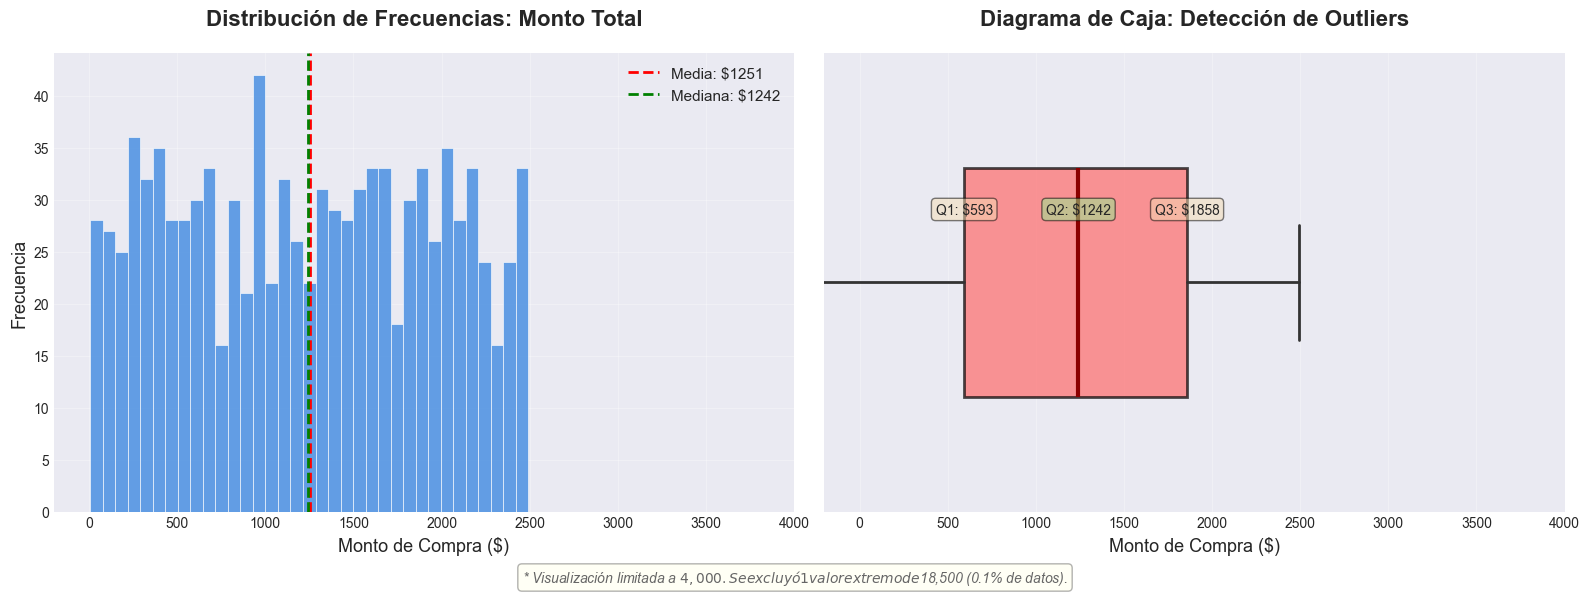

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar datos
df_comercio = pd.read_csv('comercio_ya_bruto.csv')

# Calcular estadísticas
Q1 = df_comercio['monto_total'].quantile(0.25)
Q3 = df_comercio['monto_total'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos para visualización
df_viz = df_comercio[df_comercio['monto_total'] <= 4000].copy()

# ============================================
# OPCIÓN 1: VERSIÓN CLÁSICA MEJORADA
# ============================================
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma
axes[0].hist(df_viz['monto_total'], bins=40, color='#4A90E2', 
             edgecolor='white', alpha=0.85, linewidth=0.5)
axes[0].axvline(df_comercio['monto_total'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f'Media: ${df_comercio["monto_total"].mean():.0f}')
axes[0].axvline(df_comercio['monto_total'].median(), color='green', 
                linestyle='--', linewidth=2, label=f'Mediana: ${df_comercio["monto_total"].median():.0f}')
axes[0].set_title('Distribución de Frecuencias: Monto Total', 
                  fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Monto de Compra ($)', fontsize=13)
axes[0].set_ylabel('Frecuencia', fontsize=13)
axes[0].legend(loc='upper right', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-200, 4000)

# Boxplot horizontal
bp = axes[1].boxplot(df_viz['monto_total'], vert=False, widths=0.5,
                     patch_artist=True,
                     boxprops=dict(facecolor='#FF6B6B', alpha=0.7, linewidth=2),
                     whiskerprops=dict(linewidth=2, color='#333'),
                     capprops=dict(linewidth=2, color='#333'),
                     medianprops=dict(linewidth=3, color='darkred'))

# Anotaciones
axes[1].text(Q1, 1.15, f'Q1: ${Q1:.0f}', ha='center', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1].text(df_comercio['monto_total'].median(), 1.15, 
             f'Q2: ${df_comercio["monto_total"].median():.0f}', 
             ha='center', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
axes[1].text(Q3, 1.15, f'Q3: ${Q3:.0f}', ha='center', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].set_title('Diagrama de Caja: Detección de Outliers', 
                  fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Monto de Compra ($)', fontsize=13)
axes[1].set_xlim(-200, 4000)
axes[1].set_yticks([])
axes[1].grid(True, alpha=0.3, axis='x')

# Nota
fig.text(0.5, 0.02, 
         '* Visualización limitada a $4,000. Se excluyó 1 valor extremo de $18,500 (0.1% de datos).',
         ha='center', fontsize=10, style='italic', color='#666',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.3))

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

### 3: Generar histogramas y boxplots

La estadística descriptiva numérica nos da una base sólida, pero la visualización nos permite detectar patrones que los promedios suelen ocultar. Para **ComercioYA**, utilizaremos las librerías `Seaborn` y `Matplotlib` para generar dos gráficos complementarios sobre la variable `monto_total`:

1.  **Histograma:** Para observar la forma de la distribución de los ingresos. Nos permite ver si los datos siguen una distribución normal o si están sesgados.
2.  **Boxplot (Diagrama de Caja):** Es la herramienta estándar para detectar **valores atípicos (outliers)**. Nos muestra gráficamente los cuartiles y cualquier dato que se escape del comportamiento esperado (como el monto de $18,500 que identificamos en el IDA).

In [4]:
# 1. Cálculo del Rango Intercuartílico (IQR)
iqr = q3 - q1
umbral_superior = q3 + (1.5 * iqr)
umbral_inferior = q1 - (1.5 * iqr)

# 2. Identificar los outliers
outliers = df_comercio[df_comercio['monto_total'] > umbral_superior]

# 3. Análisis de impacto: Comparar media con y sin outliers
media_con_outliers = df_comercio['monto_total'].mean()
media_sin_outliers = df_comercio[df_comercio['monto_total'] <= umbral_superior]['monto_total'].mean()

print(f"--- 🚨 ANÁLISIS DE OUTLIERS ---")
print(f"Umbral superior detectado: ${umbral_superior:.2f}")
print(f"Cantidad de valores atípicos: {len(outliers)}")
print(f"Monto del outlier más extremo: ${outliers['monto_total'].max():.2f}")

print(f"\n--- 📊 IMPACTO EN MÉTRICAS ---")
print(f"Media CON outliers: ${media_con_outliers:.2f}")
print(f"Media SIN outliers: ${media_sin_outliers:.2f}")
print(f"Diferencia (Sesgo):  ${(media_con_outliers - media_sin_outliers):.2f}")

--- 🚨 ANÁLISIS DE OUTLIERS ---
Umbral superior detectado: $3754.97
Cantidad de valores atípicos: 1
Monto del outlier más extremo: $18500.00

--- 📊 IMPACTO EN MÉTRICAS ---
Media CON outliers: $1250.55
Media SIN outliers: $1233.28
Diferencia (Sesgo):  $17.27


### 4: Identificar valores atípicos y documentar su impacto

En las tareas anteriores detectamos visualmente la presencia de valores atípicos. Ahora, aplicaremos el método del **Rango Intercuartílico (IQR)** para identificarlos formalmente. 

Un valor se considera atípico si se encuentra fuera del rango:
$$[Q1 - 1.5 \times IQR, \ Q3 + 1.5 \times IQR]$$

**¿Por qué es importante para ComercioYA?**
Los valores atípicos pueden inflar artificialmente el ticket promedio, llevando a la empresa a tomar decisiones financieras erróneas, como esperar ingresos que el cliente común no puede generar.


Tras completar el análisis descriptivo, presentamos los hallazgos finales de esta etapa a la Dirección Estratégica:

1.  **Detección Matemática:** Se determinó que cualquier compra superior a **$3,754.97** es un comportamiento atípico para el estándar de ComercioYA. 
2.  **Efecto de Distorsión:** La presencia de outliers genera un sesgo de **$17.27** en el promedio general. Si la empresa planifica su stock basándose en la media "inflada", tendrá excedentes que el cliente normal no comprará.
3.  **Recomendación Técnica:** Para reportes de desempeño diario, se recomienda utilizar la **Mediana** como medida de tendencia central principal, ya que es robusta frente a estos valores extremos. Los outliers detectados deben ser analizados por el equipo de Ventas para entender si representan errores de sistema o clientes corporativos con potencial de fidelización.